### Import All nececary libraries

In [1]:
import os
import sys
sys.path.append('../scripts')
import EDA as eda


### Load Data

In [2]:
df = eda.LoadData("../data/raw_analyst_ratings.csv")

### Inspecting and pre-processing the data

In [3]:
eda.InspectData(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
eda.GetShape(df)

(1407328, 6)

In [5]:
eda.GetSummary(df)

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [6]:
eda.GetColumns(df)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [7]:
eda.GetColumnNames(df)

['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

In [8]:
eda.GetColumnTypes(df)

Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

### Cleaning the data

In [9]:
# Check missing value
eda.CheckMissingValue(df)

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [10]:
# Remove irelevant feature and check it again
eda.RemoveColumn(df)


### Perform descriptive statistics

Calculate the length of headlines to understand the distribution

In [11]:
eda.GetSummary(df)

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [12]:
# Calculate the new's headline lenght
dataFrame = eda.AddHeadlineLength(df)

In [13]:
dataFrame["headline_length"].head()

0    39
1    42
2    29
3    44
4    87
Name: headline_length, dtype: int64

In [14]:
# Let's view the basic statistics of the headline length
eda.GtHeadlineLengthStats(dataFrame)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Examine the publication dates to identify trends over time.

In [15]:
# Check the length of the date strings
dataFrame['date_length'] = dataFrame['date'].apply(len)
print(dataFrame['date_length'].value_counts())

date_length
19    1351341
25      55987
Name: count, dtype: int64


In [16]:
df = eda.ConvertDdate(dataFrame)
df

,headline,url,publisher,date,stock,headline_length,date_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,25
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,25
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,25
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,25
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,25
...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38,19
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52,19
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56,19
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54,19


In [17]:
formattedData = eda.EctractTimeFormat(dataFrame)

In [18]:
formattedData.head()

,headline,url,publisher,date,stock,headline_length,date_length,year,month,day,hour,minute
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,25,2020,6,5,10,30
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,25,2020,6,3,10,45
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,25,2020,5,26,4,30
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,25,2020,5,22,12,45
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,25,2020,5,22,11,38


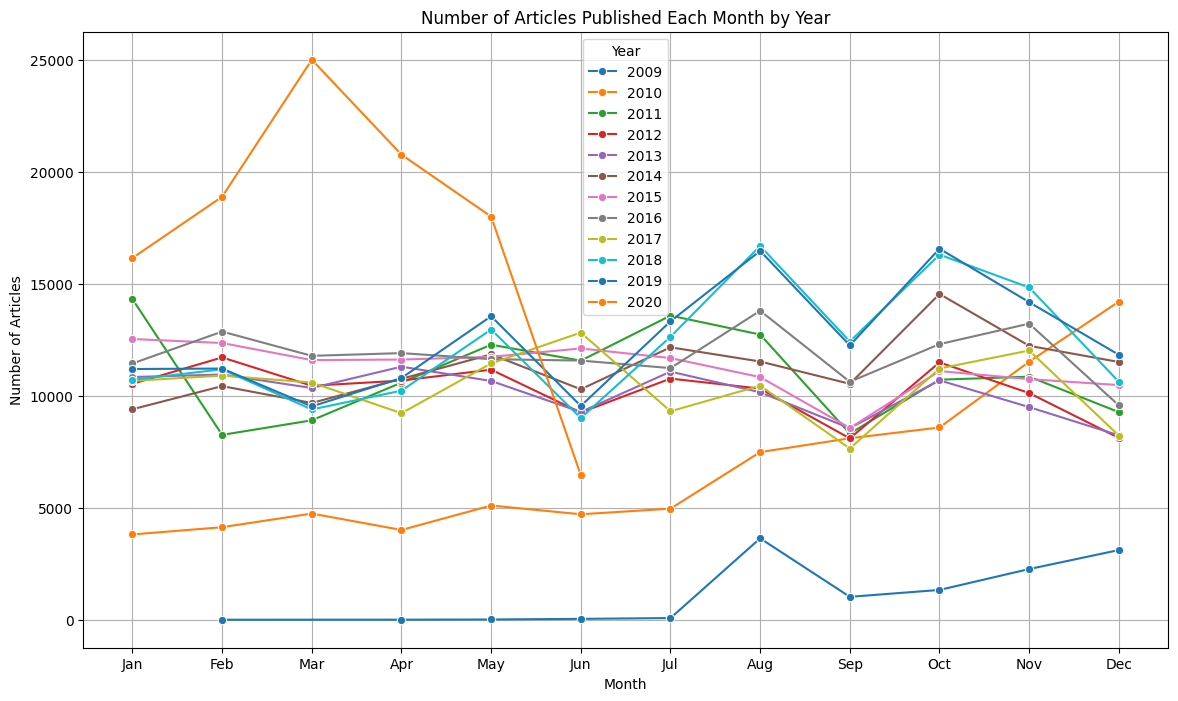

In [19]:
eda.ArticlePublishedYearly(formattedData)

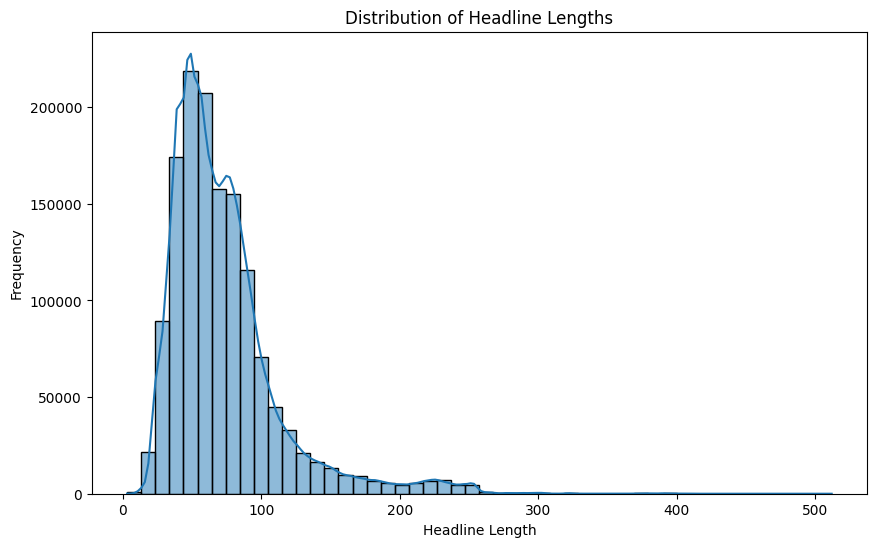

In [20]:
eda.HeadlineLength(formattedData)


e:\Development\10-Accademy-week-1\notebooks\../scripts\EDA.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


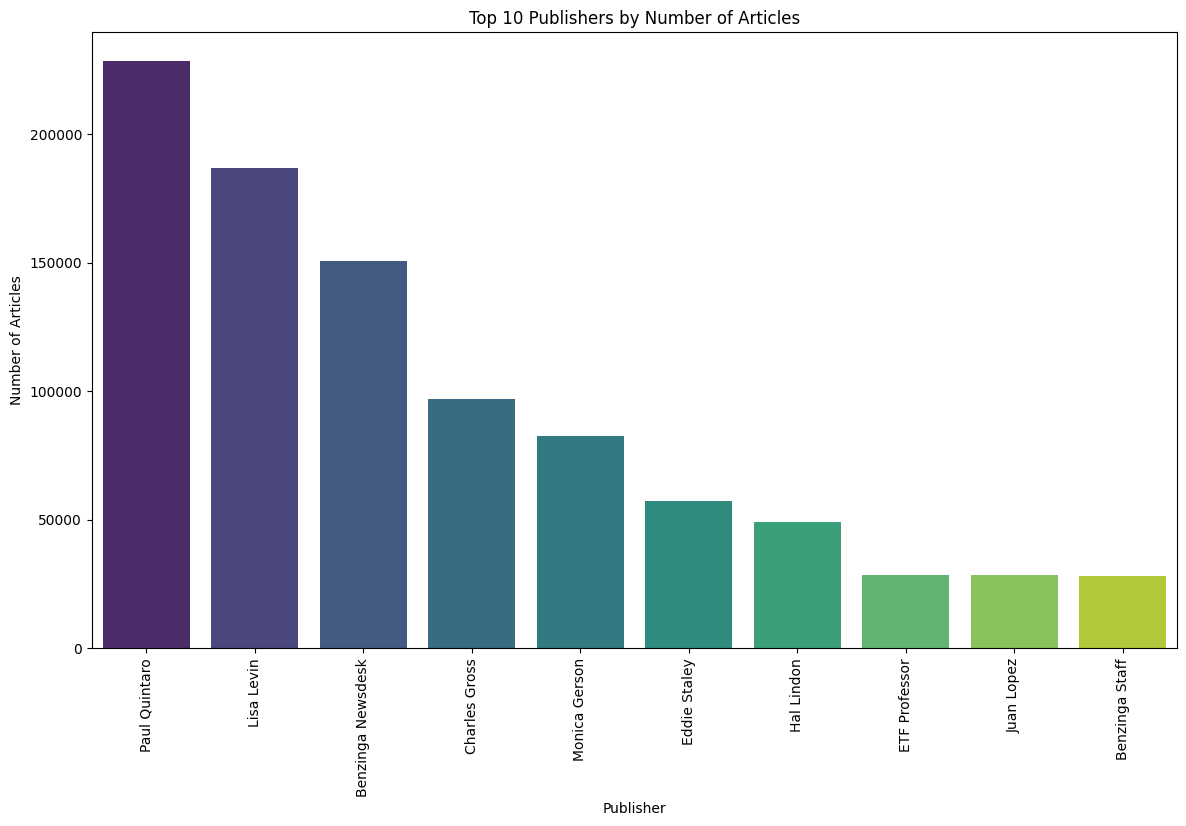

In [21]:
eda.TopPublisher(formattedData)

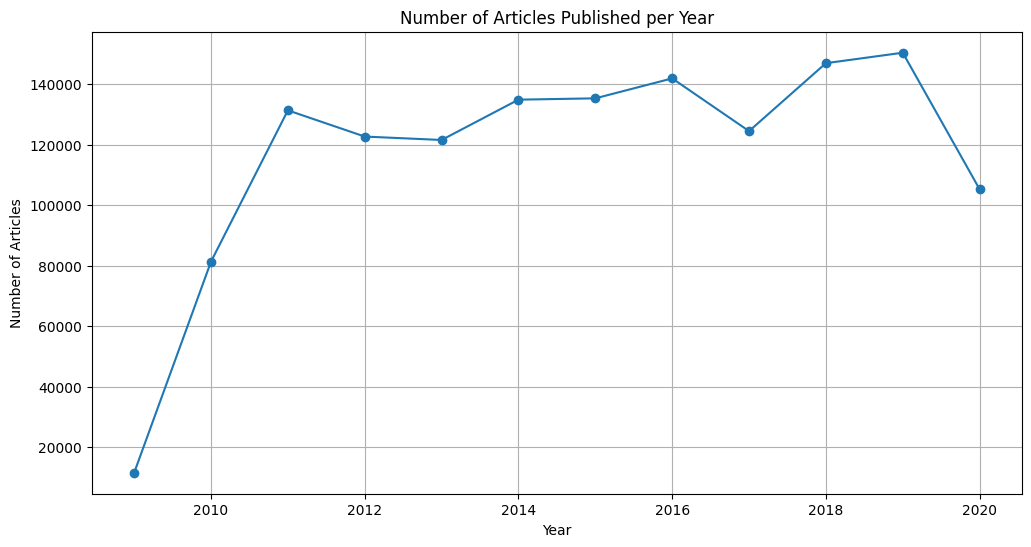

In [22]:
eda.YearlyArticlePublished(formattedData)

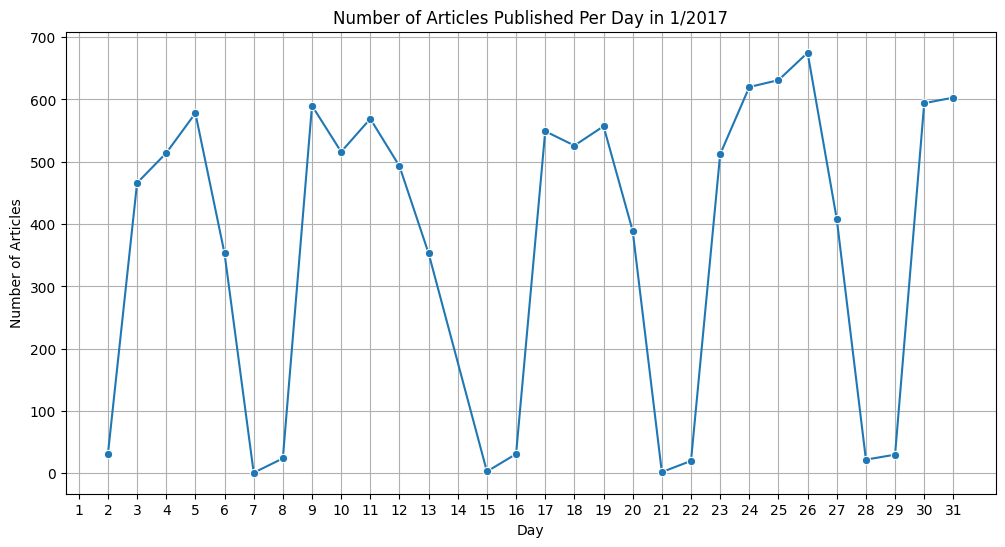

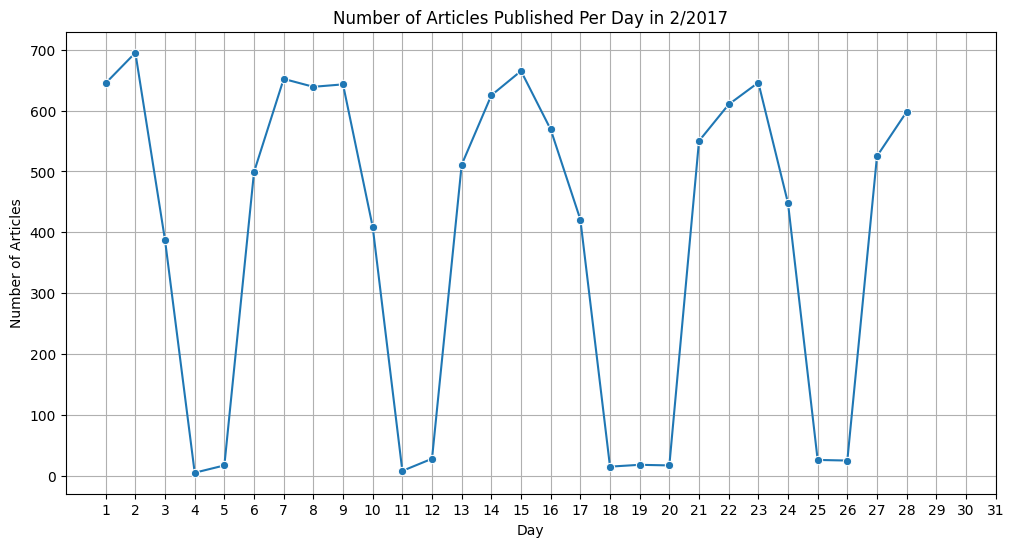

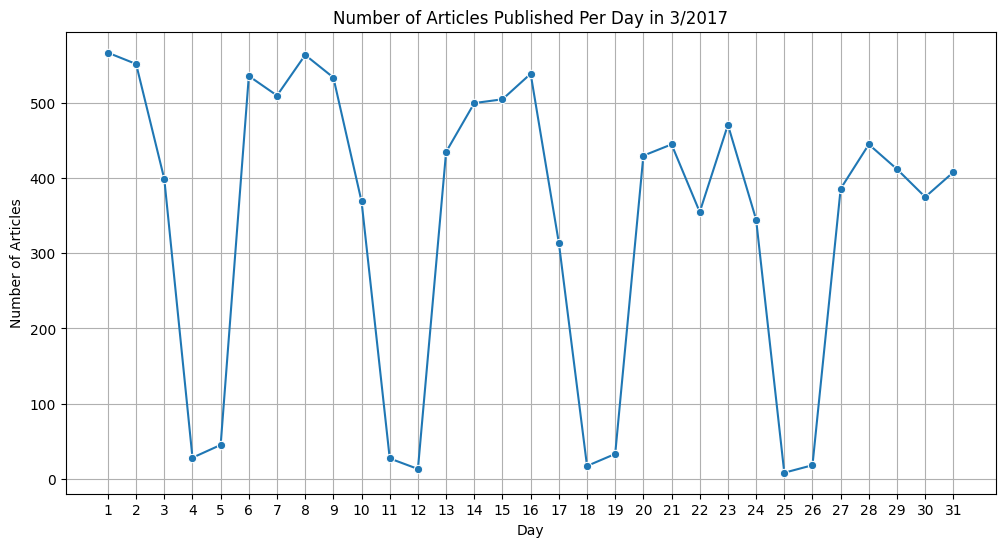

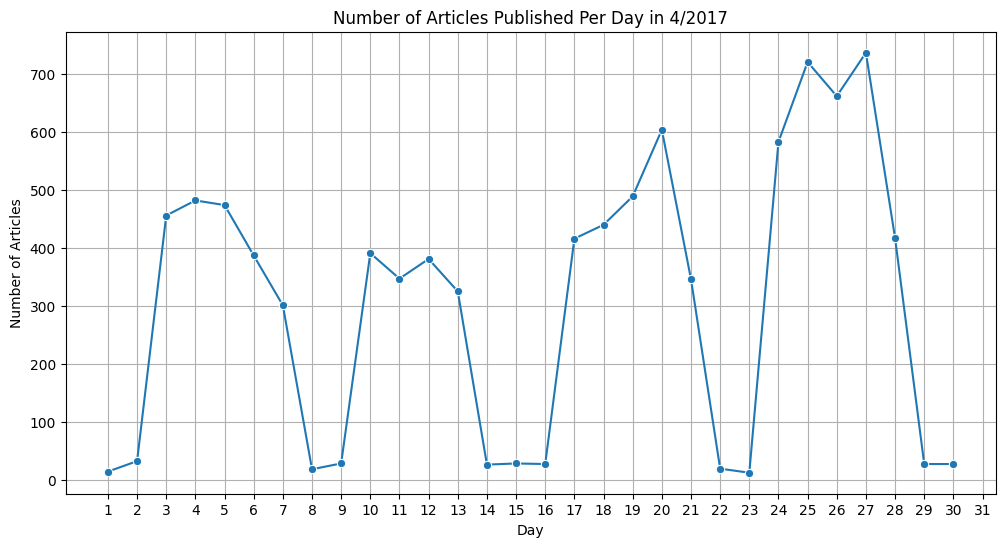

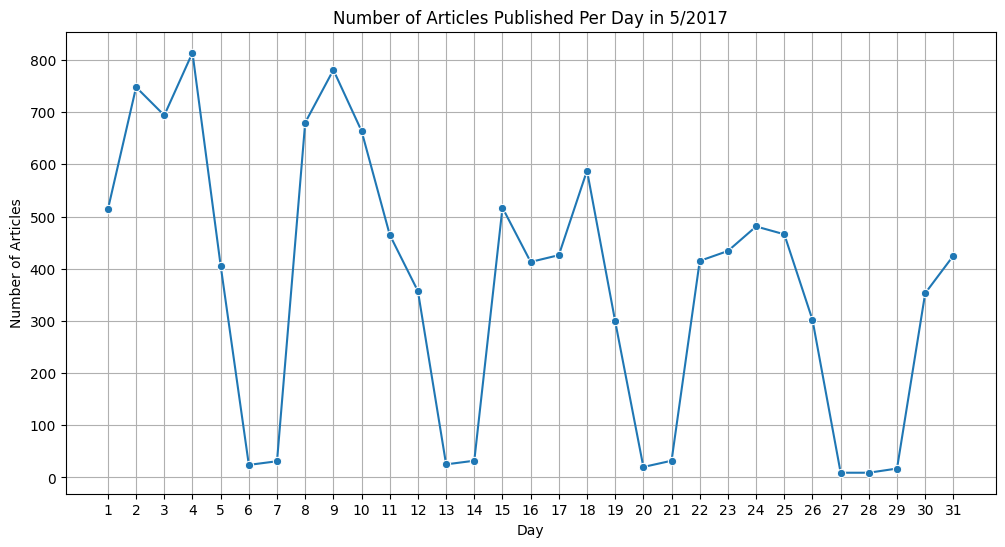

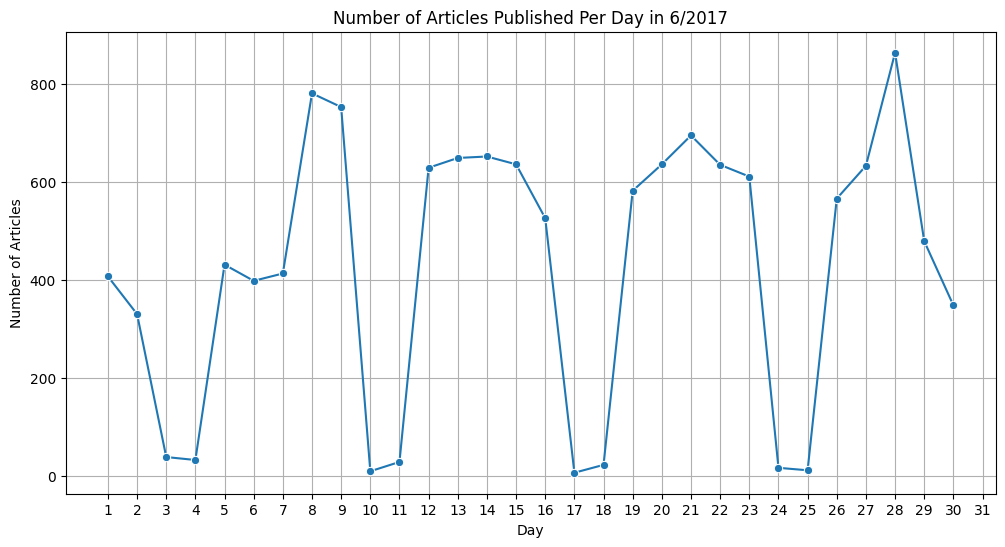

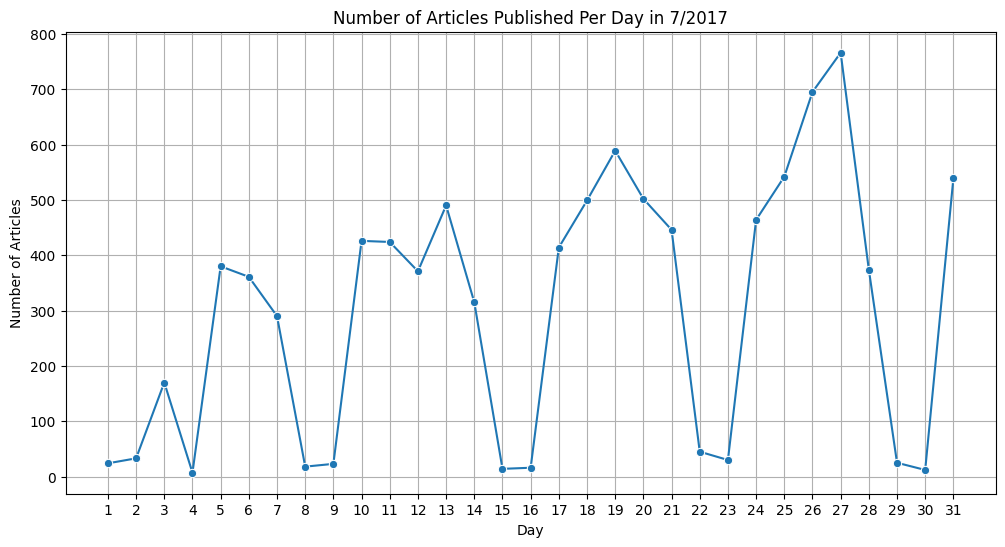

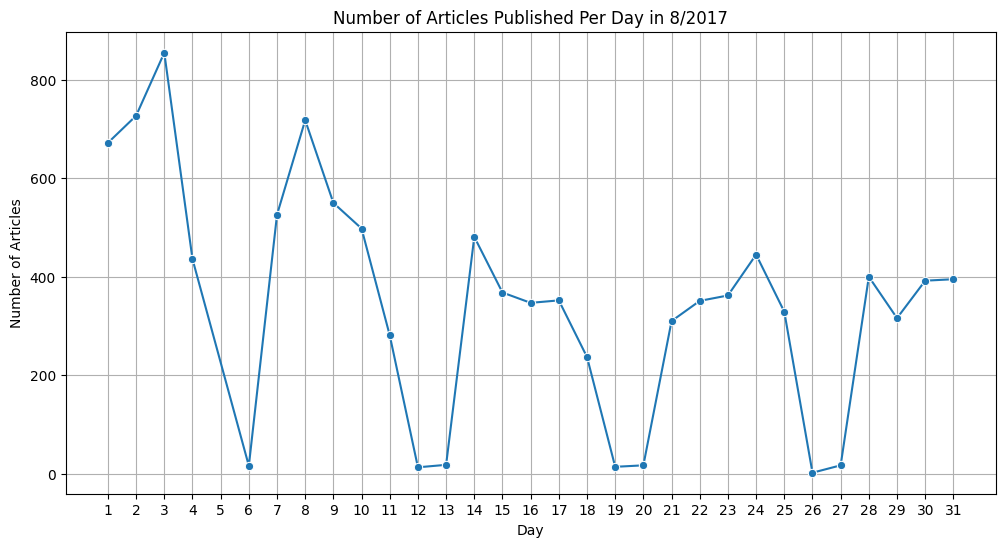

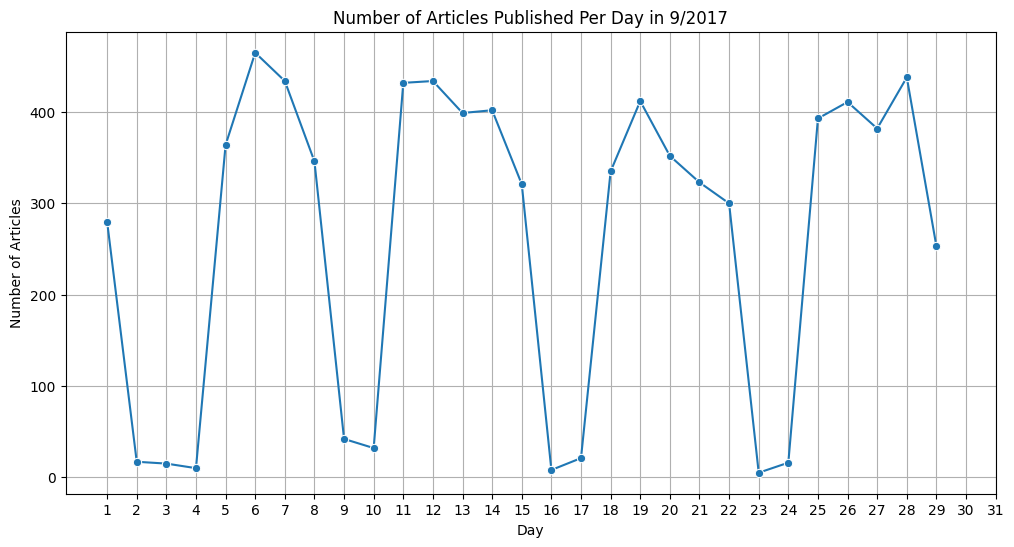

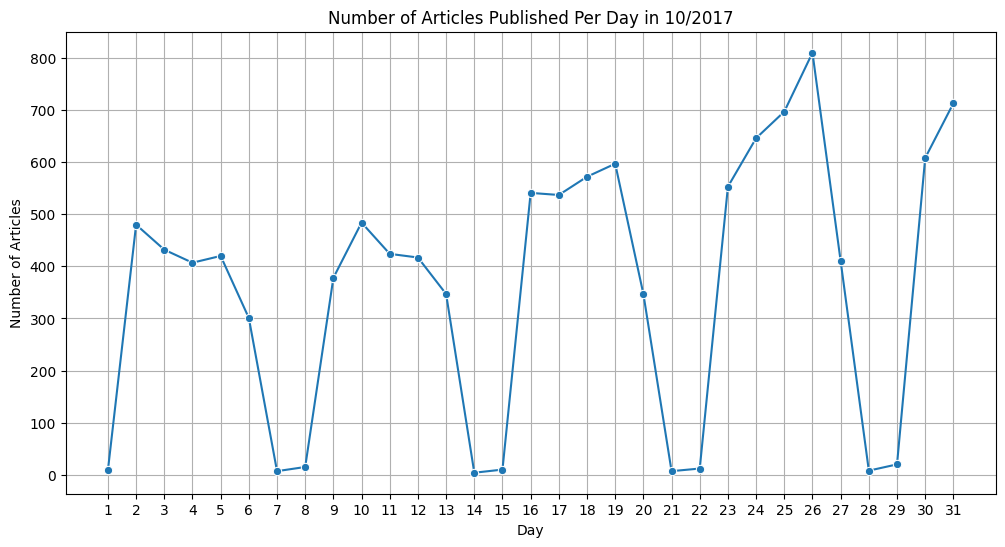

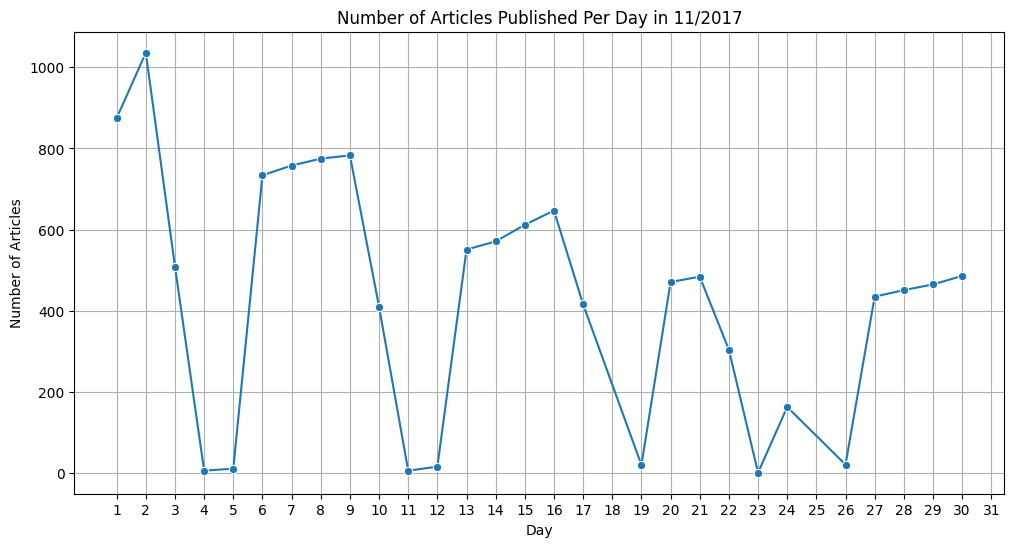

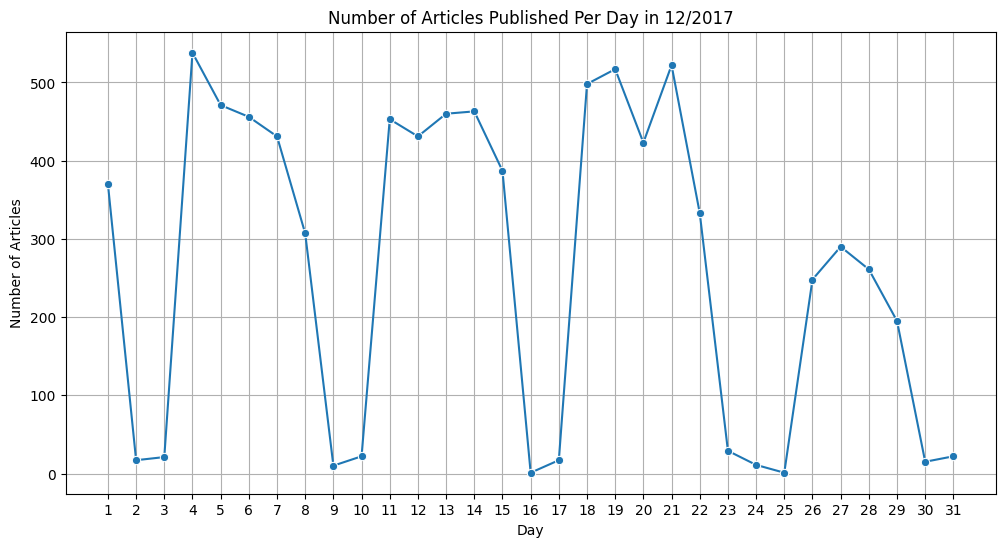

In [23]:
eda.DailyArticlesPublishedEachMonth(formattedData)